In [1]:
import pandas as pd
import scipy as sp
import scipy.stats
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import sklearn as sk
import requests
import time
from sklearn.model_selection import train_test_split
from sklearn import linear_model 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import RobustScaler

In [2]:
# 정제된 데이터가져오기
df = pd.read_csv("df1_16.csv", encoding='utf-8')
df.head(1)


,year,quarter,district,code,workpop,floatpop,prop_2030s,prop_06_11,prop_11_14,prop_14_17,...,no_of_store,no_of_franch_store,no_of_bank,no_of_pharm,no_of_theartre,no_of_accom,no_of_STA,sales,sales_female_ratio,sales_weekday_ratio
0,2018,1,1000001,CS100001,831.0,188508.0,0.409338,0.011467,0.407748,0.151499,...,15.0,0.0,0.0,0.0,16.0,38.0,0.0,922621269.0,0.351752,0.70405


In [3]:
# 시군구 데이터 가져오기
cgoongoo=pd.read_csv("cgoongoo1.csv", encoding='utf-8')
cgoongoo.head(1)

,district,cgoongoo
0,1001453,11620


In [4]:
# 시군구와 정제된 데이터 머지
df1=pd.merge(df, cgoongoo, on=['district'])
df1.head()

,year,quarter,district,code,workpop,floatpop,prop_2030s,prop_06_11,prop_11_14,prop_14_17,...,no_of_franch_store,no_of_bank,no_of_pharm,no_of_theartre,no_of_accom,no_of_STA,sales,sales_female_ratio,sales_weekday_ratio,cgoongoo
0,2018,1,1000001,CS100001,831.0,188508.0,0.409338,0.011467,0.407748,0.151499,...,0.0,0.0,0.0,16.0,38.0,0.0,922621269.0,0.351752,0.704050,11110
1,2018,1,1000001,CS100002,831.0,188508.0,0.473122,0.004000,0.504362,0.157013,...,1.0,0.0,0.0,16.0,38.0,0.0,176034744.0,0.324470,0.769975,11110
2,2018,1,1000001,CS100003,831.0,188508.0,0.440999,0.000000,0.653076,0.120070,...,0.0,0.0,0.0,16.0,38.0,0.0,45454124.0,0.358348,0.848584,11110
3,2018,1,1000001,CS100004,831.0,188508.0,0.575315,0.000597,0.325943,0.269932,...,0.0,0.0,0.0,16.0,38.0,0.0,351079289.0,0.494218,0.548148,11110
4,2018,1,1000001,CS100005,831.0,188508.0,0.503582,0.000282,0.612311,0.163809,...,1.0,0.0,0.0,16.0,38.0,0.0,163624875.0,0.490051,0.845680,11110


In [5]:
df1.columns

Index(['year', 'quarter', 'district', 'code', 'workpop', 'floatpop',
       'prop_2030s', 'prop_06_11', 'prop_11_14', 'prop_14_17', 'prop_17_21',
       'prop_21_24', 'apt_no_of_cmplx', 'apt_avg_space', 'apt_avg_price',
       'inc_monthly_avg', 'expnd_total', 'no_of_store', 'no_of_franch_store',
       'no_of_bank', 'no_of_pharm', 'no_of_theartre', 'no_of_accom',
       'no_of_STA', 'sales', 'sales_female_ratio', 'sales_weekday_ratio',
       'cgoongoo'],
      dtype='object')

In [6]:
df1.drop(['year','quarter','district'],axis=1,inplace=True)


In [8]:
# 비율을 값으로 바꾸기
df2=df1.copy()
df2.drop(['prop_2030s','prop_06_11','prop_11_14','prop_14_17', 'prop_17_21', 'prop_21_24','sales_female_ratio',
       'sales_weekday_ratio'],axis=1,inplace=True)
df3= df1[['prop_2030s','prop_06_11','prop_11_14','prop_14_17', 'prop_17_21', 'prop_21_24','sales_female_ratio',
       'sales_weekday_ratio']]
df3['s_2030s'] = df3['prop_2030s']*df1['sales']
df3['s_06_11'] = df3['prop_06_11']*df1['sales']
df3['s_11_14'] = df3['prop_11_14']*df1['sales']
df3['s_14_17'] = df3['prop_14_17']*df1['sales']
df3['s_17_21'] = df3['prop_17_21']*df1['sales']
df3['s_21_24'] = df3['prop_21_24']*df1['sales']
df3['sales_female'] = df3['sales_female_ratio']*df1['sales']
df3['sales_weekday'] = df3['sales_weekday_ratio']*df1['sales']
df3.head(1)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydat

,prop_2030s,prop_06_11,prop_11_14,prop_14_17,prop_17_21,prop_21_24,sales_female_ratio,sales_weekday_ratio,s_2030s,s_06_11,s_11_14,s_14_17,s_17_21,s_21_24,sales_female,sales_weekday
0,0.409338,0.011467,0.407748,0.151499,0.346293,0.082993,0.351752,0.70405,3.776641e+08,1.057984e+07,3.761972e+08,1.397762e+08,3.194972e+08,7.657082e+07,324533489.0,649571088.0


In [10]:
#데이터 콘캣
df4= pd.concat([df2,df3], axis=1)
df4.columns

Index(['code', 'workpop', 'floatpop', 'apt_no_of_cmplx', 'apt_avg_space',
       'apt_avg_price', 'inc_monthly_avg', 'expnd_total', 'no_of_store',
       'no_of_franch_store', 'no_of_bank', 'no_of_pharm', 'no_of_theartre',
       'no_of_accom', 'no_of_STA', 'sales', 'cgoongoo', 'prop_2030s',
       'prop_06_11', 'prop_11_14', 'prop_14_17', 'prop_17_21', 'prop_21_24',
       'sales_female_ratio', 'sales_weekday_ratio', 's_2030s', 's_06_11',
       's_11_14', 's_14_17', 's_17_21', 's_21_24', 'sales_female',
       'sales_weekday'],
      dtype='object')

In [11]:
# 같은 시군구 코드와 서비스코드 특성 합치기
df5=df4.groupby(['cgoongoo', 'code']).sum()

In [12]:
df5.reset_index(inplace=True)


In [16]:
df5.drop(['prop_2030s','','prop_11_14','prop_14_17', 'prop_17_21', 'prop_21_24','sales_female_ratio',
       'sales_weekday_ratio'],axis=1,inplace=True)

In [17]:
df5.columns

Index(['cgoongoo', 'code', 'workpop', 'floatpop', 'apt_no_of_cmplx',
       'apt_avg_space', 'apt_avg_price', 'inc_monthly_avg', 'expnd_total',
       'no_of_store', 'no_of_franch_store', 'no_of_bank', 'no_of_pharm',
       'no_of_theartre', 'no_of_accom', 'no_of_STA', 'sales', 's_2030s',
       's_06_11', 's_11_14', 's_14_17', 's_17_21', 's_21_24', 'sales_female',
       'sales_weekday'],
      dtype='object')

In [21]:
df5['prop_2030s'] = df5['s_2030s'] / df5['sales']
df5['prop_06_11'] = df5['s_06_11'] / df5['sales']
df5['prop_14_17'] = df5['s_11_14'] / df5['sales']
df5['prop_17_21'] = df5['s_14_17'] / df5['sales']
df5['prop_21_24'] = df5['s_21_24'] / df5['sales']
df5['sales_female_ratio'] = df5['sales_female'] / df5['sales']
df5['sales_weekday_ratio'] = df5['sales_weekday'] / df5['sales']

In [38]:
df5.drop(columns=['s_2030s', 's_06_11', 's_11_14', 's_14_17', 's_17_21', 's_21_24', 'sales_female', 'sales_weekday'], inplace=True)

In [63]:
df5.columns=['cgoongoo', 'code', 'drop', 'sales', 'workpop', 'floatpop',
       'apt_no_of_cmplx', 'apt_avg_space', 'apt_avg_price', 'inc_monthly_avg',
       'expnd_total', 'no_of_store', 'no_of_franch_store', 'no_of_bank',
       'no_of_pharm', 'no_of_theartre', 'no_of_accom', 'no_of_STA', 's_total',
       'prop_2030s', 'prop_06_11', 'prop_14_17', 'prop_17_21', 'prop_21_24',
       'sales_female_ratio', 'sales_weekday_ratio']

In [65]:
df5.drop(columns=['drop'], inplace=True)

In [66]:
df5.columns

Index(['cgoongoo', 'code', 'sales', 'workpop', 'floatpop', 'apt_no_of_cmplx',
       'apt_avg_space', 'apt_avg_price', 'inc_monthly_avg', 'expnd_total',
       'no_of_store', 'no_of_franch_store', 'no_of_bank', 'no_of_pharm',
       'no_of_theartre', 'no_of_accom', 'no_of_STA', 's_total', 'prop_2030s',
       'prop_06_11', 'prop_14_17', 'prop_17_21', 'prop_21_24',
       'sales_female_ratio', 'sales_weekday_ratio'],
      dtype='object')

In [67]:
df6=df5[df5.columns[2:]]
df6.columns

Index(['sales', 'workpop', 'floatpop', 'apt_no_of_cmplx', 'apt_avg_space',
       'apt_avg_price', 'inc_monthly_avg', 'expnd_total', 'no_of_store',
       'no_of_franch_store', 'no_of_bank', 'no_of_pharm', 'no_of_theartre',
       'no_of_accom', 'no_of_STA', 's_total', 'prop_2030s', 'prop_06_11',
       'prop_14_17', 'prop_17_21', 'prop_21_24', 'sales_female_ratio',
       'sales_weekday_ratio'],
      dtype='object')

In [68]:
# RobustScaling
rb = RobustScaler()
rb.fit(df6)
X_robust_scaled = rb.transform(df6)
dfX=pd.DataFrame(X_robust_scaled, columns= df6.columns)
dfX.head()

,sales,workpop,floatpop,apt_no_of_cmplx,apt_avg_space,apt_avg_price,inc_monthly_avg,expnd_total,no_of_store,no_of_franch_store,...,no_of_accom,no_of_STA,s_total,prop_2030s,prop_06_11,prop_14_17,prop_17_21,prop_21_24,sales_female_ratio,sales_weekday_ratio
0,4.562540,0.071498,-0.184217,-0.068866,0.553904,0.586335,0.373904,-0.261041,2.925197,2.407407,...,3.408333,-0.75,4.583559,0.007292,-0.468971,0.938993,-0.748406,0.310107,-0.491142,-0.273380
1,-0.115083,-0.225809,-0.581797,-0.449608,-0.207124,-0.122076,-0.338366,-0.616451,-0.221785,0.222222,...,2.091667,-0.75,-0.100705,0.271092,-0.511038,1.350022,-0.772824,-0.084227,-0.638090,-0.238458
2,-0.130547,-0.326097,-0.615906,-0.462346,-0.390658,-0.327032,-0.457941,-0.660578,-0.240157,0.111111,...,1.841667,-0.75,-0.106847,0.309526,-0.555052,0.908014,-0.973378,0.588512,-0.444216,-0.051880
3,1.109929,-0.110195,-0.487068,-0.336246,0.222458,0.329624,-0.001957,-0.522991,0.494751,0.407407,...,2.833333,-0.75,1.135447,0.403596,-0.436909,0.284950,-0.410603,0.604377,-0.186349,-0.682820
4,0.296972,-0.251873,-0.371809,-0.274185,-0.003067,0.058262,-0.096010,-0.459763,0.662730,2.111111,...,2.966667,-0.75,0.299938,0.703176,-0.284749,0.759947,-0.308204,0.038003,0.091196,-0.557647


In [70]:
dfX.columns

Index(['sales', 'workpop', 'floatpop', 'apt_no_of_cmplx', 'apt_avg_space',
       'apt_avg_price', 'inc_monthly_avg', 'expnd_total', 'no_of_store',
       'no_of_franch_store', 'no_of_bank', 'no_of_pharm', 'no_of_theartre',
       'no_of_accom', 'no_of_STA', 's_total', 'prop_2030s', 'prop_06_11',
       'prop_14_17', 'prop_17_21', 'prop_21_24', 'sales_female_ratio',
       'sales_weekday_ratio'],
      dtype='object')

In [71]:
dfX2=dfX.copy()
dfX2.drop(['sales'],axis=1,inplace=True)
dfX2.columns


Index(['workpop', 'floatpop', 'apt_no_of_cmplx', 'apt_avg_space',
       'apt_avg_price', 'inc_monthly_avg', 'expnd_total', 'no_of_store',
       'no_of_franch_store', 'no_of_bank', 'no_of_pharm', 'no_of_theartre',
       'no_of_accom', 'no_of_STA', 's_total', 'prop_2030s', 'prop_06_11',
       'prop_14_17', 'prop_17_21', 'prop_21_24', 'sales_female_ratio',
       'sales_weekday_ratio'],
      dtype='object')

In [72]:
# 서비스 코드 , 상권코드 콘캣
result=pd.concat([df5[['cgoongoo','code']],dfX], axis=1)
result

,cgoongoo,code,sales,workpop,floatpop,apt_no_of_cmplx,apt_avg_space,apt_avg_price,inc_monthly_avg,expnd_total,...,no_of_accom,no_of_STA,s_total,prop_2030s,prop_06_11,prop_14_17,prop_17_21,prop_21_24,sales_female_ratio,sales_weekday_ratio
0,11110,CS100001,4.562540,0.071498,-0.184217,-0.068866,0.553904,0.586335,0.373904,-0.261041,...,3.408333,-0.75,4.583559,0.007292,-0.468971,0.938993,-0.748406,0.310107,-0.491142,-0.273380
1,11110,CS100002,-0.115083,-0.225809,-0.581797,-0.449608,-0.207124,-0.122076,-0.338366,-0.616451,...,2.091667,-0.75,-0.100705,0.271092,-0.511038,1.350022,-0.772824,-0.084227,-0.638090,-0.238458
2,11110,CS100003,-0.130547,-0.326097,-0.615906,-0.462346,-0.390658,-0.327032,-0.457941,-0.660578,...,1.841667,-0.75,-0.106847,0.309526,-0.555052,0.908014,-0.973378,0.588512,-0.444216,-0.051880
3,11110,CS100004,1.109929,-0.110195,-0.487068,-0.336246,0.222458,0.329624,-0.001957,-0.522991,...,2.833333,-0.75,1.135447,0.403596,-0.436909,0.284950,-0.410603,0.604377,-0.186349,-0.682820
4,11110,CS100005,0.296972,-0.251873,-0.371809,-0.274185,-0.003067,0.058262,-0.096010,-0.459763,...,2.966667,-0.75,0.299938,0.703176,-0.284749,0.759947,-0.308204,0.038003,0.091196,-0.557647
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1117,11740,CS300013,-0.229237,0.273095,0.330542,0.254759,-0.066525,0.022188,-0.040647,0.311628,...,0.075000,0.50,-0.207478,-0.962714,-0.061351,0.218016,0.454717,-0.254019,0.610654,0.164461
1118,11740,CS300014,-0.095525,0.567337,0.679152,0.388885,0.201934,0.272252,0.230404,0.525392,...,0.275000,1.25,-0.070045,0.042701,-0.018425,0.135178,0.338318,-0.272143,0.572835,-0.420481
1119,11740,CS300015,0.292860,-0.283876,-0.264466,-0.206657,-0.537627,-0.429481,-0.505989,-0.261446,...,-0.333333,0.00,0.325586,-0.806175,-0.042115,0.026722,0.550350,-0.346827,0.139231,-0.689319
1120,11740,CS300016,0.689789,0.613186,1.295242,1.071556,0.837698,0.881018,0.860798,1.359438,...,0.475000,1.25,0.728793,-0.547720,2.255145,0.179702,0.029975,-0.360063,-0.827797,0.675336


In [73]:
#서비스코드 더미화
result2 = pd.get_dummies(result)
result2.columns

Index(['cgoongoo', 'sales', 'workpop', 'floatpop', 'apt_no_of_cmplx',
       'apt_avg_space', 'apt_avg_price', 'inc_monthly_avg', 'expnd_total',
       'no_of_store', 'no_of_franch_store', 'no_of_bank', 'no_of_pharm',
       'no_of_theartre', 'no_of_accom', 'no_of_STA', 's_total', 'prop_2030s',
       'prop_06_11', 'prop_14_17', 'prop_17_21', 'prop_21_24',
       'sales_female_ratio', 'sales_weekday_ratio', 'code_CS100001',
       'code_CS100002', 'code_CS100003', 'code_CS100004', 'code_CS100005',
       'code_CS100006', 'code_CS100007', 'code_CS100008', 'code_CS100009',
       'code_CS100010', 'code_CS200001', 'code_CS200002', 'code_CS200003',
       'code_CS200004', 'code_CS200005', 'code_CS200006', 'code_CS200007',
       'code_CS200008', 'code_CS200009', 'code_CS200010', 'code_CS200011',
       'code_CS200012', 'code_CS200013', 'code_CS200014', 'code_CS200015',
       'code_CS200016', 'code_CS200017', 'code_CS200018', 'code_CS300001',
       'code_CS300002', 'code_CS300003', 'code_

In [74]:
result3 = pd.get_dummies(result2['cgoongoo'], prefix='d')
result3.columns

Index(['d_11110', 'd_11140', 'd_11170', 'd_11200', 'd_11215', 'd_11230',
       'd_11260', 'd_11290', 'd_11305', 'd_11320', 'd_11350', 'd_11380',
       'd_11410', 'd_11440', 'd_11470', 'd_11500', 'd_11530', 'd_11545',
       'd_11560', 'd_11590', 'd_11620', 'd_11650', 'd_11680', 'd_11710',
       'd_11740'],
      dtype='object')

In [75]:
result4 = pd.concat([result2,result3] ,axis=1)
result4.head()
result4.drop(['cgoongoo','sales'],axis=1,inplace=True )
result4.columns

Index(['workpop', 'floatpop', 'apt_no_of_cmplx', 'apt_avg_space',
       'apt_avg_price', 'inc_monthly_avg', 'expnd_total', 'no_of_store',
       'no_of_franch_store', 'no_of_bank', 'no_of_pharm', 'no_of_theartre',
       'no_of_accom', 'no_of_STA', 's_total', 'prop_2030s', 'prop_06_11',
       'prop_14_17', 'prop_17_21', 'prop_21_24', 'sales_female_ratio',
       'sales_weekday_ratio', 'code_CS100001', 'code_CS100002',
       'code_CS100003', 'code_CS100004', 'code_CS100005', 'code_CS100006',
       'code_CS100007', 'code_CS100008', 'code_CS100009', 'code_CS100010',
       'code_CS200001', 'code_CS200002', 'code_CS200003', 'code_CS200004',
       'code_CS200005', 'code_CS200006', 'code_CS200007', 'code_CS200008',
       'code_CS200009', 'code_CS200010', 'code_CS200011', 'code_CS200012',
       'code_CS200013', 'code_CS200014', 'code_CS200015', 'code_CS200016',
       'code_CS200017', 'code_CS200018', 'code_CS300001', 'code_CS300002',
       'code_CS300003', 'code_CS300004', 'code_CS30

In [76]:
import numpy as np
np.log(df5['sales'])

0       25.243436
1       22.730452
2       22.692236
3       24.109282
4       23.423148
          ...    
1117    22.406401
1118    22.776783
1119    23.418148
1120    23.812783
1121    22.133978
Name: sales, Length: 1122, dtype: float64

In [77]:
# OLS
import statsmodels.api as sm

X= result4
y= np.log(df5['sales'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

df_train=pd.concat([y_train, X_train], axis=1)

model= sm.OLS.from_formula("sales ~ "+" + ".join(df_train.columns[1:]), data=df_train)
result =  model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     41.98
Date:                Tue, 17 Dec 2019   Prob (F-statistic):          3.53e-226
Time:                        11:37:13   Log-Likelihood:                -775.79
No. Observations:                 785   AIC:                             1734.
Df Residuals:                     694   BIC:                             2158.
Df Model:                          90                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              21.1817    

In [78]:
# 모델 생성
lm = linear_model.LinearRegression()

# 학습
lm.fit(X_train, y_train)

# 예측
pred_y = lm.predict(X_train)

print("정확도 : ", str(round(lm.score(X_test, y_test), 4) * 100) + "%")

정확도 :  81.16%


In [79]:
# LASSO 모형
#importing libraries
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

In [80]:
reg = LassoCV()
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Best alpha using built-in LassoCV: 0.002100
Best score using built-in LassoCV: 0.831055


In [81]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 72 variables and eliminated the other 20 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

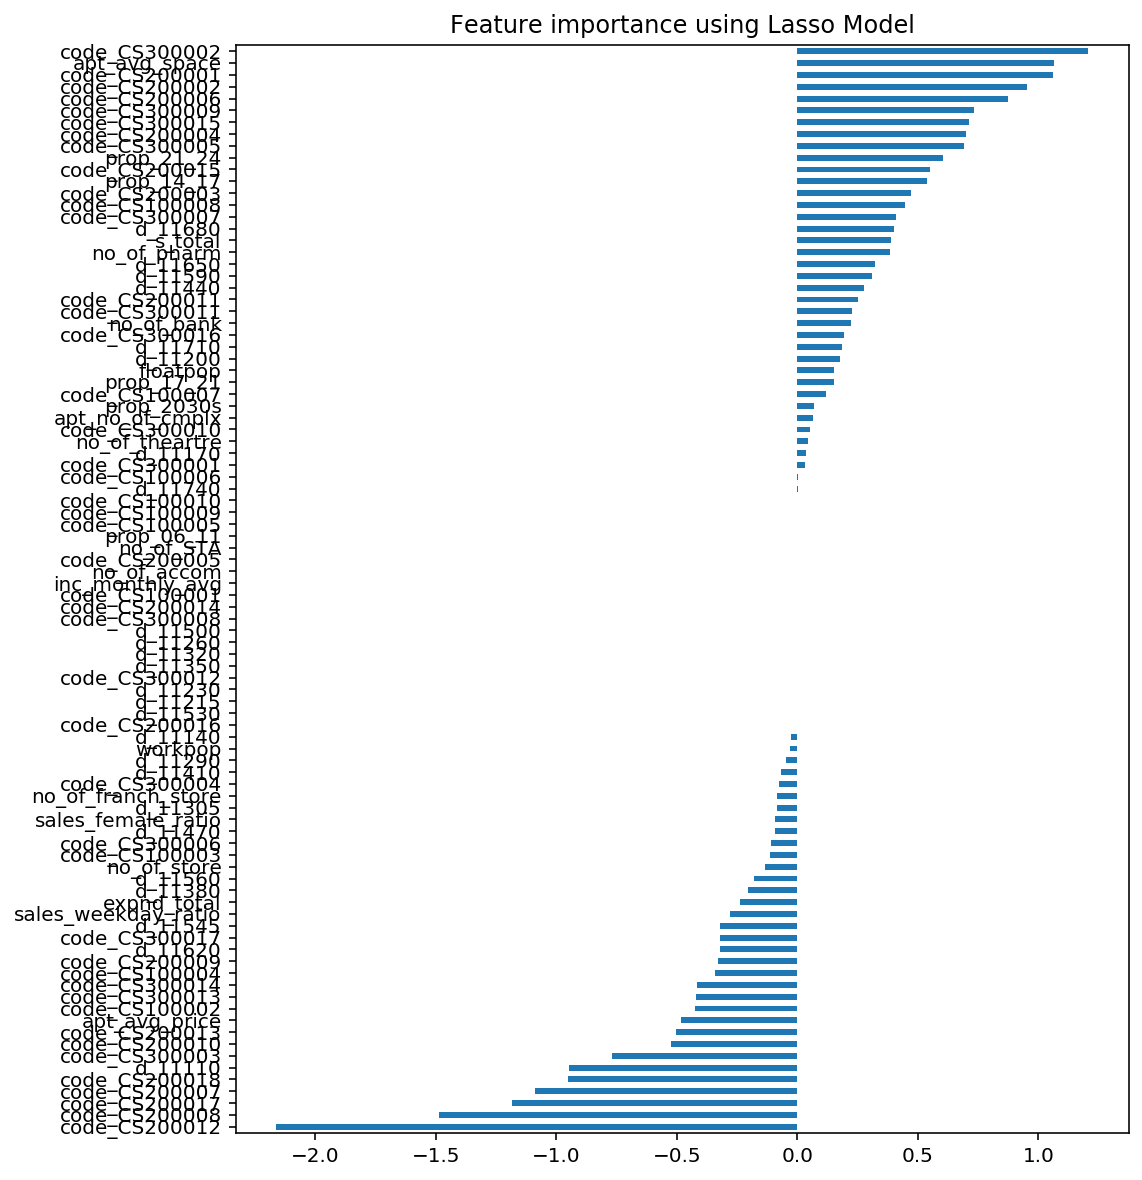

In [82]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

In [83]:
drop_columns=imp_coef[imp_coef.values==0].index

In [84]:
result4.drop(columns=drop_columns,inplace=True )


In [85]:
result4.columns

Index(['workpop', 'floatpop', 'apt_no_of_cmplx', 'apt_avg_space',
       'apt_avg_price', 'expnd_total', 'no_of_store', 'no_of_franch_store',
       'no_of_bank', 'no_of_pharm', 'no_of_theartre', 's_total', 'prop_2030s',
       'prop_14_17', 'prop_17_21', 'prop_21_24', 'sales_female_ratio',
       'sales_weekday_ratio', 'code_CS100002', 'code_CS100003',
       'code_CS100004', 'code_CS100006', 'code_CS100007', 'code_CS100008',
       'code_CS200001', 'code_CS200002', 'code_CS200003', 'code_CS200004',
       'code_CS200006', 'code_CS200007', 'code_CS200008', 'code_CS200009',
       'code_CS200010', 'code_CS200011', 'code_CS200012', 'code_CS200013',
       'code_CS200015', 'code_CS200017', 'code_CS200018', 'code_CS300001',
       'code_CS300002', 'code_CS300003', 'code_CS300004', 'code_CS300005',
       'code_CS300006', 'code_CS300007', 'code_CS300009', 'code_CS300010',
       'code_CS300011', 'code_CS300013', 'code_CS300014', 'code_CS300015',
       'code_CS300016', 'code_CS300017', 'd_

In [86]:
# OLS
import statsmodels.api as sm

X= result4
y= np.log(df5['sales'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

df_train=pd.concat([y_train, X_train], axis=1)

model= sm.OLS.from_formula("sales ~ "+" + ".join(df_train.columns[1:]), data=df_train)
result =  model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     51.82
Date:                Tue, 17 Dec 2019   Prob (F-statistic):          1.97e-236
Time:                        11:37:33   Log-Likelihood:                -788.41
No. Observations:                 785   AIC:                             1723.
Df Residuals:                     712   BIC:                             2063.
Df Model:                          72                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              22.4790    

In [87]:
#오차합 구하기
y_pred = result .predict(X_test)
resid=y_test-y_pred
rss=np.sum(resid**2)
MSE=rss/(result.nobs-2)

#RMSE 구하기
from statsmodels.tools.eval_measures import rmse

rmse = rmse(y_test, y_pred)
MSE, rmse

(0.19563734978493225, 0.6742047626375911)

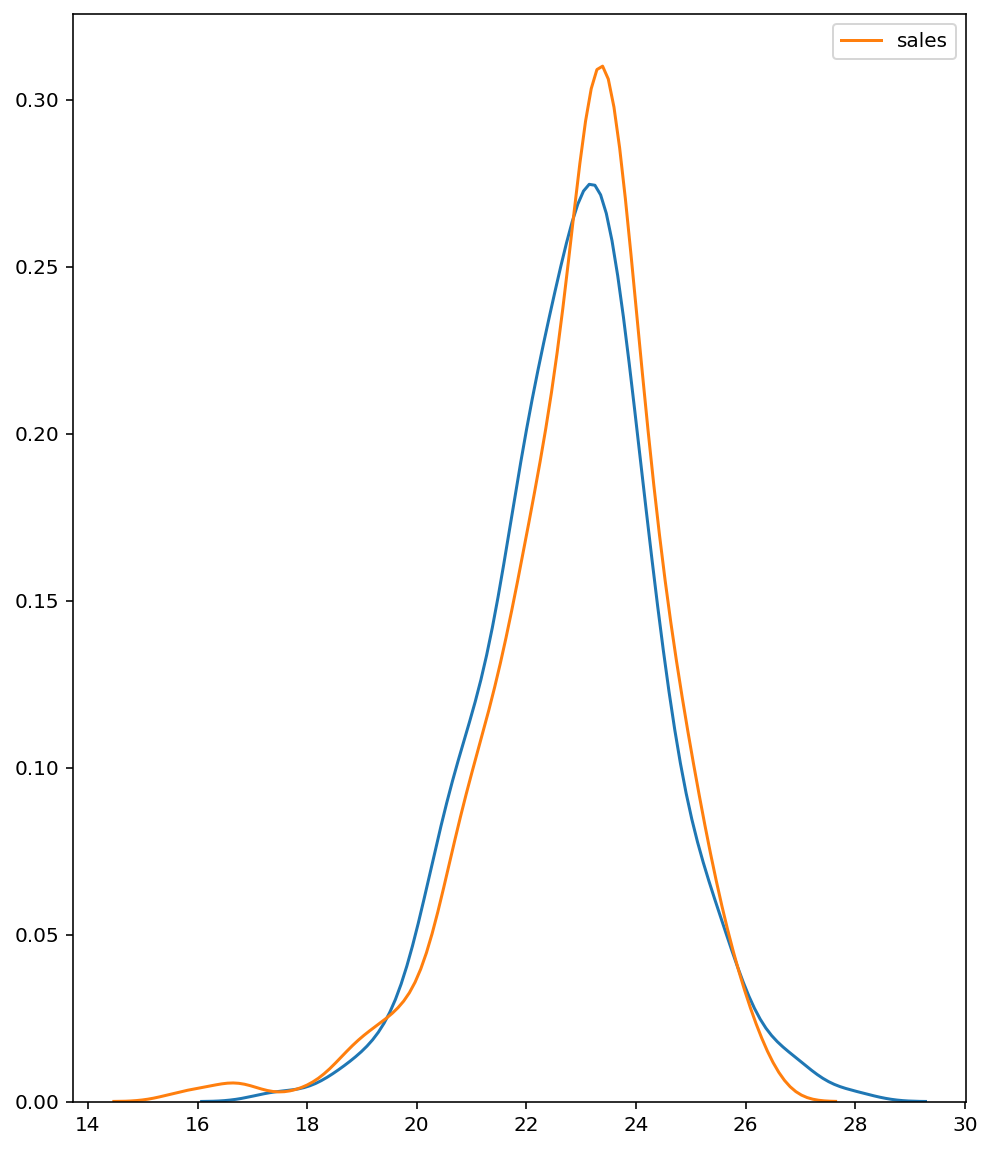

In [88]:
y_pred = result .predict(X_test)
sns.kdeplot(y_pred)
sns.kdeplot(y_test)
# plt.title("")
plt.show()


In [89]:
# 파랑색: 모델링으로 예측한 y_pred 값
# 오렌지: 원래 sales 값

#### 1. 과최적화 일어났는지 K-fold 교차검증

In [90]:
# OLS
import statsmodels.api as sm

X= result4
y= np.log(df5['sales'])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

df_train=pd.concat([y_train, X_train], axis=1)

model= sm.OLS.from_formula("sales ~ "+" + ".join(df_train.columns[1:]), data=df_train)
result =  model.fit()
print(result.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.840
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     51.82
Date:                Tue, 17 Dec 2019   Prob (F-statistic):          1.97e-236
Time:                        11:37:42   Log-Likelihood:                -788.41
No. Observations:                 785   AIC:                             1723.
Df Residuals:                     712   BIC:                             2063.
Df Model:                          72                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept              22.4790    

In [91]:
from sklearn.model_selection import KFold

df_kfold=pd.concat([y,X], axis=1)
train_r2=[]
test_r2 =[]
scores = np.zeros(5)
cv = KFold(5, shuffle=True)
for i, (idx_train, idx_test) in enumerate(cv.split( df_kfold)):
    df_train =  df_kfold.iloc[idx_train]
    df_test =  df_kfold.iloc[idx_test]
    
    model = sm.OLS.from_formula("sales ~"+"+".join(df_kfold.columns[1:]), data= df_kfold)
    result = model.fit()
    
    pred = result.predict(df_test)
    rss = (( df_kfold.sales - pred) ** 2).sum()
    tss = (( df_kfold.sales -  df_kfold.sales.mean())** 2).sum()
    rsquared = 1 - rss / tss
    
    scores[i] = rsquared
    print("학습 R2 = {:.8f}, 검증 R2 = {:.8f}".format(result.rsquared, rsquared))
    train_r2.append(result.rsquared)
    test_r2.append(rsquared)
    


학습 R2 = 0.84078303, 검증 R2 = 0.97038127
학습 R2 = 0.84078303, 검증 R2 = 0.97856216
학습 R2 = 0.84078303, 검증 R2 = 0.96459175
학습 R2 = 0.84078303, 검증 R2 = 0.96307154
학습 R2 = 0.84078303, 검증 R2 = 0.96417631


(0.5, 1.2)

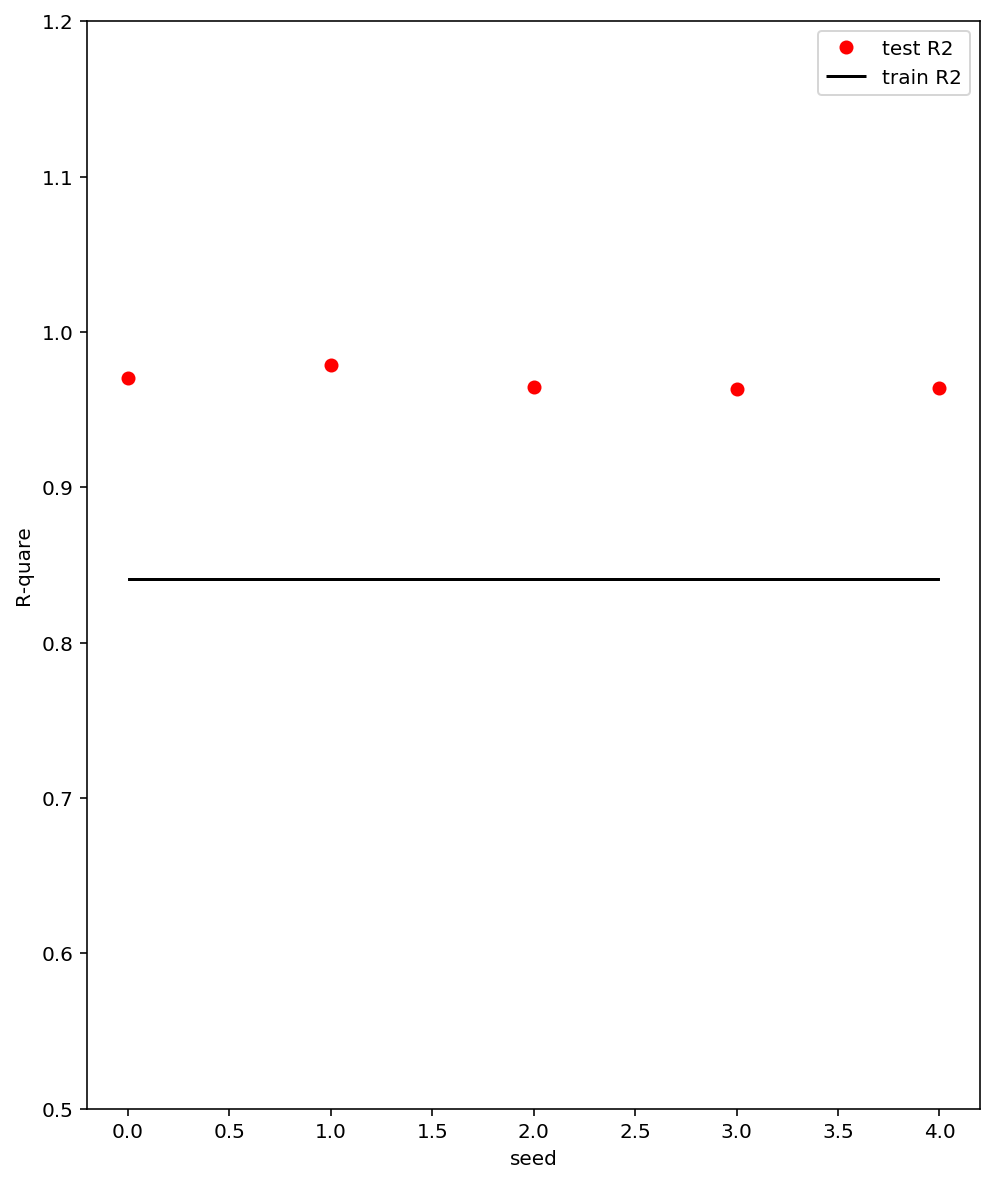

In [92]:

plt.plot(test_r2, 'ro', label="test R2")
plt.hlines(train_r2, 0, 4, label="train R2")
plt.legend()
plt.xlabel("seed")
plt.ylabel("R-quare")

plt.ylim(0.5, 1.2)